# Homework 5 - Classification of flower petal shapes

This data set consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray.

The rows being the samples and the columns being:

1. sepal length,
2. sepal width,
3. petal length and
4. petal width.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

The data comes as a dictionary. You can access the predictors using `iris.data` and the classes using `iris.target`.

In [2]:
X = iris.data
y = iris.target

**Task**: How many samples are in the data set.

**Solution**:

In [3]:
len(y)

150

**Task**: Plot the sepal length on the x-axis and the sepal width on the y-axis. Color each of the three types of irises differently.
Add a legend that gives the correct iris type (0-Setosa, 1-Versicolour, 2-Virginica)

**Solution**:

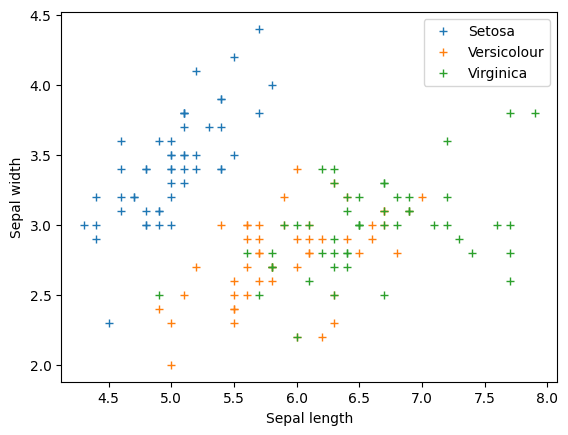

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
for l in range(3):
    # Find out indices belonging to class l
    idx = (y==l)
    plt.plot(X[idx,0],X[idx,1],'+')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['Setosa','Versicolour','Virginica']);

**Task**:
Split your data into a training and a test set.
Put the first 40 samples within each class in the training set and the remaining samples in a test data set.

**Solution**:

In [5]:
import numpy as np
train_idx = np.hstack([np.arange(0,40),np.arange(50,90),np.arange(100,140)])
test_idx  = np.hstack([np.arange(40,50),np.arange(90,100),np.arange(140,150)])
Xtrain, ytrain = X[train_idx,:],y[train_idx]
Xtest , ytest  = X[test_idx, :],y[test_idx]

In the lecture you've heard about the classification method called
*Linear discriminant analysis (LDA)*.

**Task**: Find a way using `scikit-learn` to accomplish a linear discriminant analysis.

Perform an LDA using only the first two predictors, i.e., `sepal length` and `sepal width`.

**Solution**:

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain[:,0:2],ytrain)

LinearDiscriminantAnalysis()

**Task**: What is the proportion of correctly classified irises in the *test* data set.

**Solution**:

In [7]:
prop1 = np.mean(1-np.abs(lda.predict(Xtest[:,0:2])-ytest))
print('Proportion of correct classifications: ', prop1)

Proportion of correct classifications:  0.8666666666666667


**Task**: Now, incorporate all of the predictors. How does the proportion of correct classifications change?

**Solution**:

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda2 = LinearDiscriminantAnalysis()
lda2.fit(Xtrain,ytrain)
prop2 = np.mean(1-np.abs(lda2.predict(Xtest)-ytest))
print('Proportion of correct classifications: ', prop2)

Proportion of correct classifications:  1.0
